In [ ]:
"""
This Jupyter Notebook is used to test the SVMBDT implementation for the Japser Ridge dataset. 
It also test different other ML algortithms from the function SingleMachineLearningTest(). 
The labeled figures are store on the folder /Results/Jasper_Results and the results are printed in the console. 
"""

In [1]:
#Imports 
import pip
import glob, os
from sklearn import svm 
import scipy.io as sc
import numpy as np
from HelperFunctions_ import  split_dataset_paths, subFrame,preprocessing_data, newColorLabels
from HelperFunctions_ import  combinePictures, classesInLabels, combineLabelClasses, reshape_sj, SingleMachineLearningTest
from SVMBDT import SvmDesionTreeTrain, SvmDesionTreePredict
from spectral import *
import pylab
import tables as tab
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from sklearn import datasets
import copy
import spectral
import tables as ta
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.patches as mpatches
from sklearn.ensemble import RandomForestClassifier
from PIL import Image


In [2]:
jasper_data = split_dataset_paths("../Datasets/jasper/", ["mat"])

In [3]:
jasper = sc.loadmat(jasper_data["mat"][1])["Y"]
jasper_gt = sc.loadmat(jasper_data["mat"][0])
jasper_labels = np.argmax(jasper_gt['A'], axis=0)

In [4]:
new_cube = np.zeros((100,100,3))

new_cube[:,:,0] = np.array(jasper[24]).reshape(100,100)
new_cube[:,:,1] = np.array(jasper[14]).reshape(100,100)
new_cube[:,:,2] = np.array(jasper[9]).reshape(100,100)

new_cube /= new_cube.max()/2
new_cube[new_cube > 1 ] = 1

plt.imshow(new_cube)
plt.axis('off')
plt.savefig("../Results/Jasper_Results/Jasper_Data",dpi = 300, bbox_inches="tight")
plt.close()

In [5]:
new_jasper = reshape_sj(jasper)

X = new_jasper.transpose(0,2,1).reshape((-1,198))
X = preprocessing.scale(X, axis=0)
y = jasper_labels.flatten()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.95, random_state=1)

In [9]:
jasper_color_label = {0 : [96, 164, 132], 1 : [35,137,218], 2 : [124,252,0], 3:[105,105,105]}
t=255
cmap = {}

for i in range(len(jasper_color_label)): 
    cmap[i] = np.array(jasper_color_label[i] + [255])/255

jasper_classes = {0: "Soil", 1: "Water",2: "Three", 3:"Road"}

shape = int(np.sqrt(len(y)))

yout_color = newColorLabels(y,shape, shape,jasper_color_label)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

patches = [mpatches.Patch(color=cmap[i], label=jasper_classes[i]) for i in jasper_color_label] 

plt.imshow(yout_color)
plt.axis('off')
#plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
plt.savefig("../Results/Jasper_Results/Jasper_GT", dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_24680\1811609641.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Jasper_Results/Jasper_GT", dpi = 300, bbox_inches="tight")


In [14]:
figLegend = pylab.figure(figsize = (1.1,1.1))
figLegend.legend(handles=patches,loc = 'upper left')
figLegend.savefig("../Results/Jasper_Results/Jasper_Classes", dpi=500)

<Figure size 110x110 with 0 Axes>

In [ ]:
jasper_tree = {0: [[1],[0,2,3]], 1: [[], [[0],[2,3]]], 2 : [[],[[2],[3]]]}

iter = 1e6

jasper_svm_tree = { 0 : LinearSVC(class_weight="balanced", max_iter=iter), 
        1 : [False, LinearSVC(class_weight="balanced", max_iter=iter)], 
        2 : [False, LinearSVC(class_weight="balanced", max_iter=iter)],}


jasper_tree = {0: [[0,1],[2,3]], 1: [[[0],[1]],[[2],[3]]]}

iter = 1e6

jasper_svm_tree = { 0 : LinearSVC(class_weight="balanced", max_iter=iter), 
        1 : [LinearSVC(class_weight="balanced", max_iter=iter), LinearSVC(class_weight="balanced", max_iter=iter)]}


svm_tree_branch, data_and_labels_branches = SvmDesionTreeTrain(X_train, y_train, jasper_tree, jasper_svm_tree, sub_data=1)

predicted_label, sub_data_branch, predicted_branch_labels = SvmDesionTreePredict(X, svm_tree_branch, jasper_tree, sub_data = 1)

The training time is: 0.084 sec.
The first branch: 0.003
The prediction time is: 0.028 sec.


C:\Users\jonas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


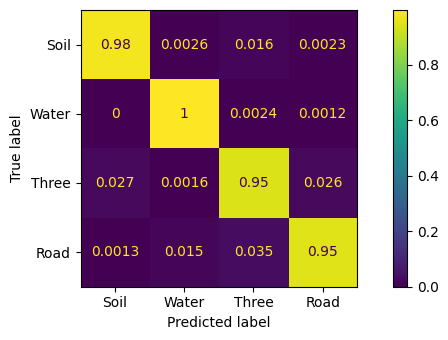

In [ ]:
name_classes = ["Soil", "Water", "Three", "Road"]

cm = confusion_matrix(y,predicted_label, normalize="true") 
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=name_classes)
cmd_obj.plot()

In [ ]:
yout_color = newColorLabels(predicted_label,shape,jasper_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Jasper_Results/Jasper_SVMBDT", dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_12736\170148752.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Jasper_Results/Jasper_SVMBDT", dpi = 300, bbox_inches="tight")


In [ ]:
sum(predicted_label==y)/len(y)

0.9745

In [ ]:
linear_ovo_yout, linear_ovr_yout, rbf_yout, kmeans_yout, knearest_yout,random_forest_yout = SingleMachineLearningTest(X,y,X_train, y_train,1e6,4)

Linear 1-vs-1 Training Time: 0.004sec.
Linear 1-vs-Rest Training Time: 0.493sec.
RBF Training Time: 0.004994sec.
Kmeans Training Time: 0.057sec.
KNearestNeighbor Training Time: 0.001sec.
KNearestNeighbor Training Time: 0.234sec.
Linear 1-vs-1 Predict Time: 0.025sec.
Linear 1-vs-Rest Predict Time: 0.004sec.
RBF Predict Time: 0.211sec.
KMeans Predict Time: 0.006sec.
KNearestNeighbor Predict Time: 0.306sec.
Random Forest Predict Time: 0.06sec.
Linear 1-vs-1 Accuracy: 97.54%
Linear 1-vs-Rest Accuracy: 96.87%
RBF Accuracy: 95.43%
KMeans Accuracy: 7.1%
KNearestNeighbour Accuracy: 95.19999999999999%
Random Forest Accuracy: 95.39999999999999%
Linear 1-vs-1 Total SVM Support_Vectors : 44
RBF Total SVM Support_Vectors : 136
Linear 1-vs-1 Average SVM Support_Vectors : 11.0
RBF Average SVM Support_Vectors : 34.0


In [ ]:
yout_color = newColorLabels(linear_ovo_yout,shape,jasper_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Jasper_Results/Jasper_linear_ovo", dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_12736\2673854667.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Jasper_Results/Jasper_linear_ovo", dpi = 300, bbox_inches="tight")


In [ ]:
yout_color = newColorLabels(linear_ovr_yout,shape,jasper_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Jasper_Results/Jasper_linear_ovr", dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_12736\4110861080.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Jasper_Results/Jasper_linear_ovr", dpi = 300, bbox_inches="tight")


In [ ]:
yout_color = newColorLabels(rbf_yout,shape,jasper_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Jasper_Results/Jasper_RBF",dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_12736\4221797862.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Jasper_Results/Jasper_RBF",dpi = 300, bbox_inches="tight")


In [ ]:
yout_color = newColorLabels(knearest_yout,shape,jasper_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Jasper_Results/Jasper_KNN",dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_12736\3584444880.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Jasper_Results/Jasper_KNN",dpi = 300, bbox_inches="tight")


In [ ]:
yout_color = newColorLabels(random_forest_yout,shape,jasper_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Jasper_Results/Jasper_RF",dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_12736\1032792352.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Jasper_Results/Jasper_RF",dpi = 300, bbox_inches="tight")


In [ ]:
jasper_color_label = {1 : [96, 164, 132], 0 : [35,137,218], 3 : [124,252,0], 2 :[105,105,105]}
yout_color = newColorLabels(kmeans_yout,shape,jasper_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Jasper_Results/Jasper_KM",dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_12736\2190639207.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Jasper_Results/Jasper_KM",dpi = 300, bbox_inches="tight")
